![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [ ]:
# SUGERIDO: Descomenta la siguiente linea de código si requieres instalar las libreías básicas utilizadas en este notebook
# Si requieres incluir más librerías puedes agregarlas al archivo Semana 4\requirements.txt
# !pip install -r requirements.txt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [ ]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [ ]:
df.shape

(541462, 3)

<Axes: >

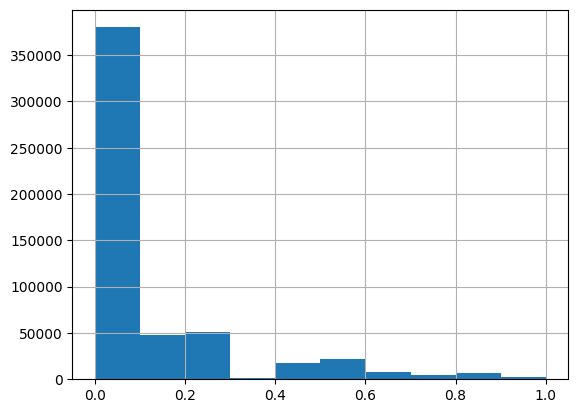

In [ ]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [ ]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [ ]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 1
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# 1. Crear el vectorizador
vectorizer = CountVectorizer()

# 2. Transformar los textos
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 3. Crear y entrenar un modelo de regresión
model = Ridge()
model.fit(X_train_vec, y_train)

# 4. Predecir sobre el set de test
y_pred = model.predict(X_test_vec)

# 5. Calcular y mostrar el MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE del modelo Ridge con CountVectorizer: {mse:.4f}")


MSE del modelo Ridge con CountVectorizer: 0.0261


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# 1. Crear el vectorizador para trigramas
vectorizer_trigrams = CountVectorizer(ngram_range=(3, 3))  # solo trigramas

# 2. Transformar los textos
X_train_trigrams = vectorizer_trigrams.fit_transform(X_train)
X_test_trigrams = vectorizer_trigrams.transform(X_test)

# 3. Crear y entrenar el modelo de regresión
model_trigrams = Ridge()
model_trigrams.fit(X_train_trigrams, y_train)

# 4. Predecir sobre el set de test
y_pred_trigrams = model_trigrams.predict(X_test_trigrams)

# 5. Calcular y mostrar el MSE
mse_trigrams = mean_squared_error(y_test, y_pred_trigrams)
print(f"MSE del modelo Ridge con CountVectorizer (trigramas): {mse_trigrams:.4f}")


MSE del modelo Ridge con CountVectorizer (trigramas): 0.0368


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

**¿Qué es?**  

`TfidfVectorizer` es una técnica de tokenización que convierte un conjunto de documentos en una matriz de características numéricas, utilizando la métrica TF-IDF (*Term Frequency - Inverse Document Frequency*). Esta métrica mide la **importancia relativa de una palabra** en un documento, teniendo en cuenta su frecuencia en el documento y su rareza en el cuerpo completo.

**¿Cómo funciona?**  

TF-IDF calcula un peso para cada término en cada documento basado en:
- **TF (Term Frequency):** Frecuencia con la que aparece una palabra en un documento.
- **IDF (Inverse Document Frequency):** Logaritmo inverso de la cantidad de documentos en los que aparece la palabra.

$$
\text{TF-IDF}(t,d) = \text{TF}(t,d) \times \log\left(\frac{N}{\text{DF}(t)}\right)
$$

donde:

donde:

- \( t \): término o palabra
- \( d \): documento
- \( N \): número total de documentos en el corpus
- \( DF(t) \): número de documentos que contienen el término \( t \)


**Ventajas frente a CountVectorizer:**

- Da menos peso a palabras comunes como "el", "la", "de", que suelen aparecer en muchos documentos pero aportan poco significado.
- Mejora la representación semántica al resaltar palabras que son más importantes para un documento en particular.
- Puede mejorar el rendimiento en modelos de clasificación y regresión al reducir el "ruido" de palabras frecuentes.

**Desventajas frente a CountVectorizer:**

- Es más complejo y requiere más tiempo de cómputo.
- Puede ser sensible a documentos muy cortos (donde la IDF se distorsiona).
- No siempre mejora el rendimiento en todos los modelos; depende del contexto y del tipo de texto.



**En resumen**, `TfidfVectorizer` es útil cuando queremos que nuestro modelo preste más atención a palabras distintivas y menos a palabras comunes en todo el cuerpo del documento.


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# 1. Crear el vectorizador TF-IDF
vectorizer_tfidf = TfidfVectorizer()

# 2. Transformar los textos
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

# 3. Crear y entrenar el modelo de regresión
model_tfidf = Ridge()
model_tfidf.fit(X_train_tfidf, y_train)

# 4. Predecir sobre el set de test
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

# 5. Calcular y mostrar el MSE
mse_tfidf = mean_squared_error(y_test, y_pred_tfidf)
print(f"MSE del modelo Ridge con TfidfVectorizer: {mse_tfidf:.4f}")

MSE del modelo Ridge con TfidfVectorizer: 0.0181


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

                        Modelo       MSE
0  CountVectorizer (unigramas)  0.026128
1  CountVectorizer (trigramas)  0.036780
2              TfidfVectorizer  0.018051


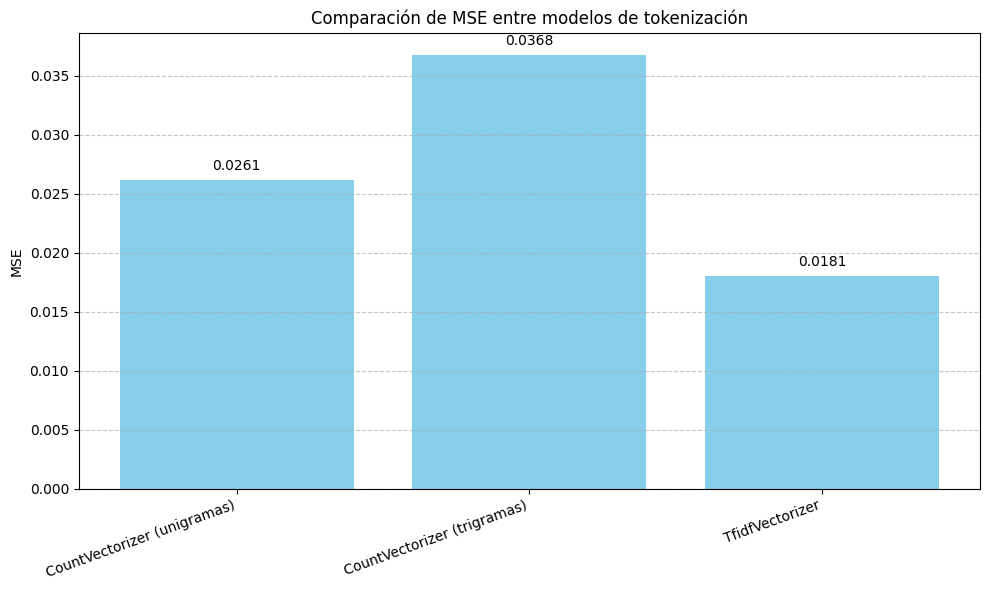

In [ ]:
# Celda 5 Código para graficos y tablas comparativas
import pandas as pd
import matplotlib.pyplot as plt

# Crear un resumen de los resultados
resultados = {
    'Modelo': [
        'CountVectorizer (unigramas)',
        'CountVectorizer (trigramas)',
        'TfidfVectorizer'
    ],
    'MSE': [
        mse,         # Resultado del Punto 1
        mse_trigrams, # Resultado del Punto 2
        mse_tfidf     # Resultado del Punto 4
    ]
}

# Convertir a DataFrame para visualizar
df_resultados = pd.DataFrame(resultados)

# Mostrar tabla
print(df_resultados)

# Gráfico
plt.figure(figsize=(10,6))
bars = plt.bar(df_resultados['Modelo'], df_resultados['MSE'], color='skyblue')
plt.xticks(rotation=20, ha='right')
plt.ylabel('MSE')
plt.title('Comparación de MSE entre modelos de tokenización')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir los valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.4f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # pequeño desplazamiento arriba
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Punto 5.1 – Comparación y análisis de resultados

A continuación, se comparan los resultados de los tres modelos entrenados con diferentes técnicas de tokenización:

| Modelo                         | MSE      |
|-------------------------------|----------|
| CountVectorizer (unigramas)   | 0.0261   |
| CountVectorizer (trigramas)   | 0.0368   |
| TfidfVectorizer               | 0.0181   |

#### Análisis:

- El modelo entrenado con **TfidfVectorizer** obtuvo el menor **Error Cuadrático Medio (MSE)**, con un valor de **0.0181**, lo que indica mejor capacidad de predicción en la probabilidad de comentarios tóxicos.
- **CountVectorizer con unigramas** también muestra un desempeño aceptable (**MSE = 0.0261**), pero claramente inferior al de TfidfVectorizer.
- **CountVectorizer con trigramas** resultó ser el menos efectivo (**MSE = 0.0368**), lo cual puede deberse a la alta dimensionalidad y esparsidad que generan los trigramas, especialmente cuando no se tiene un corpus extremadamente grande o limpio.

#### Conclusión:

El preprocesamiento de texto impacta significativamente el desempeño del modelo. Usar **TF-IDF** mejora la calidad del input al ponderar mejor los términos relevantes, reduciendo el peso de palabras muy frecuentes y poco informativas. Esto sugiere que la calidad del vectorizador puede ser tan importante como la elección del modelo en tareas de PLN.
